# Low dimensional Outlier Detection

## Summary
This documentation 

## Questions to be answered
- [Dead End] Does X predict Z?
- Does Y correlate with Z?

### Imports
Imports should be grouped in the following order:
1. Magics

2. Alphabetical order
    
    A. standard librarby imports
    
    B. related 3rd party imports
    
    C. local application/library specific imports

In [1]:
# Magics
%matplotlib inline
# Do below if you want interactive matplotlib plot ()
# %matplotlib notebook

# Reload modules before executing user code
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

# Show version information for dependency modules
# https://github.com/jrjohansson/version_information
%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas

Software versions
Python 3.5.2 64bit [MSC v.1900 64 bit (AMD64)]
IPython 5.1.0
OS Windows 7 6.1.7601 SP1
numpy 1.11.1
scipy 0.18.1
matplotlib 1.5.3
pandas 0.18.1
Fri Dec 09 12:30:11 2016 W. Europe Standard Time

In [1]:
# Standard library
import os
import sys
# sys.path.append('../src/')

# Third party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.font_manager
import seaborn as sns

# Local imports

In [2]:
# Customizations
sns.set() # matplotlib defaults

# Any tweaks that normally go in .matplotlibrc, etc., should be explicitly stated here
plt.rcParams['figure.figsize'] = (12,8)
%config InlineBackend.figure_format = 'retina'

### Load data

#### References
References to any data sources.

In [3]:
df = pd.read_pickle('../data/wss_all')

In [4]:
df = df.dropna(axis=0, how='any').reset_index(drop = True)

In [7]:
df1 = df[df['ebs_mfg'] == 'Haldex'][['mean','NA_ratio']]

In [8]:
X1 = df1.values

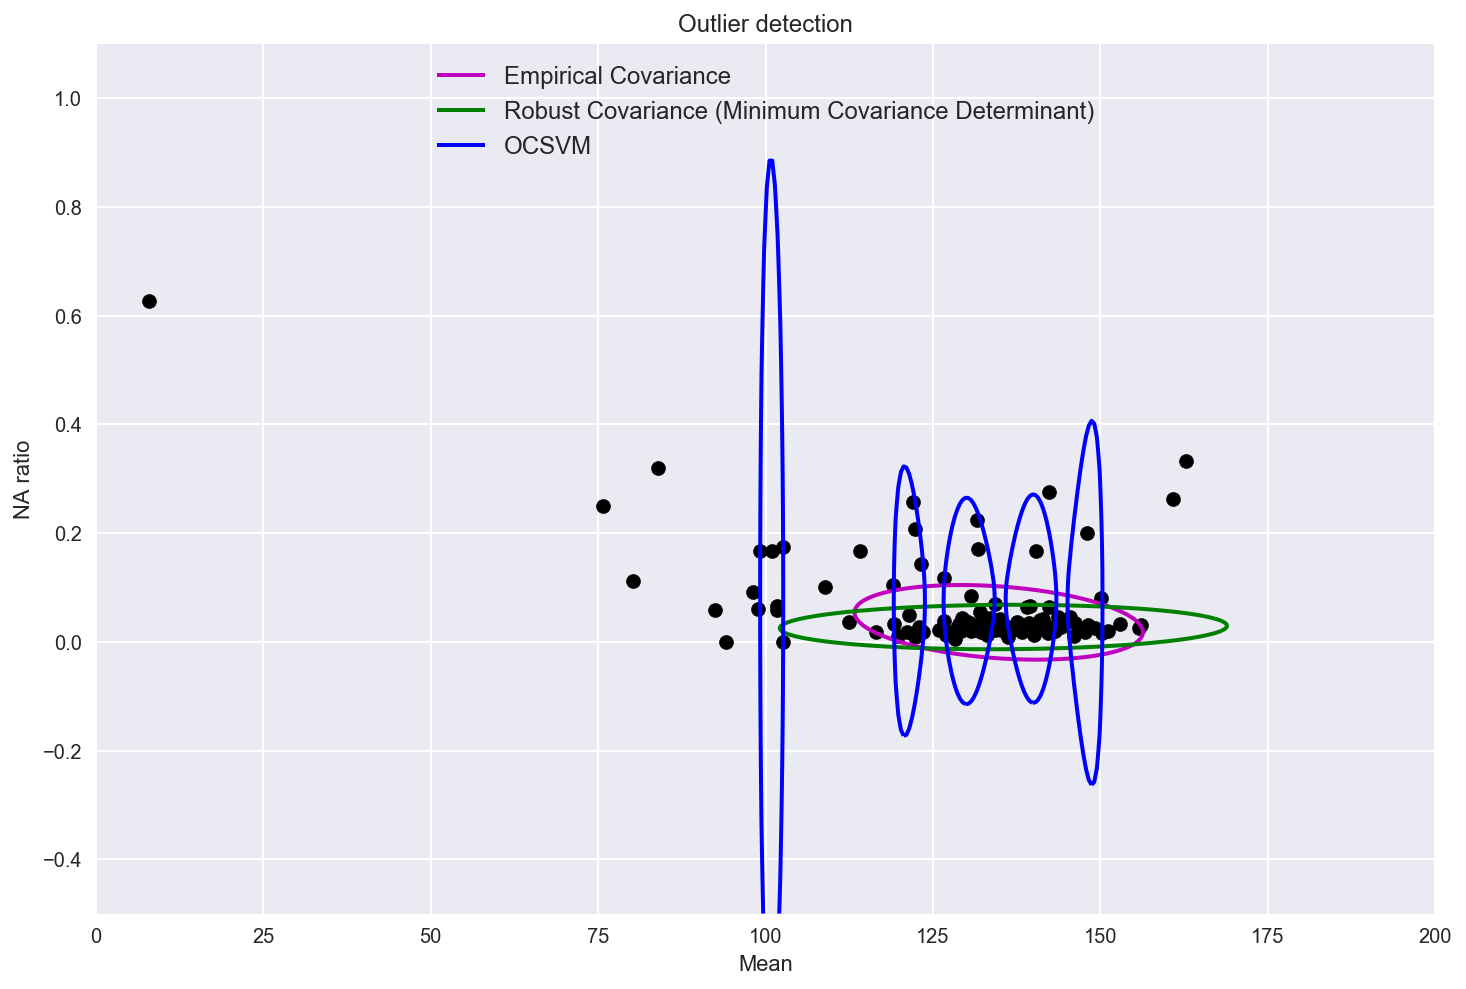

In [9]:
# Define "classifiers" to be used
classifiers = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.,
                                             contamination=0.25),
    "Robust Covariance (Minimum Covariance Determinant)":
    EllipticEnvelope(contamination=0.25),
    "OCSVM": OneClassSVM(nu=0.25, gamma=0.01)}
colors = ['m', 'g', 'b']
legend1 = {}

# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(0, 200, 500), np.linspace(-0.5, 1.1, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(1)  # two clusters
plt.title("Outlier detection")
plt.scatter(X1[:, 0], X1[:, 1], color='black')
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0],
            legend1_values_list[1].collections[0],
            legend1_values_list[2].collections[0]),
           (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=12))
plt.ylabel("NA ratio")
plt.xlabel("Mean")
plt.show()

In [12]:
df2 = df[df['ebs_mfg'] == 'Knorr Bremse'][['mean','NA_ratio']]

In [13]:
X2 = df2.values

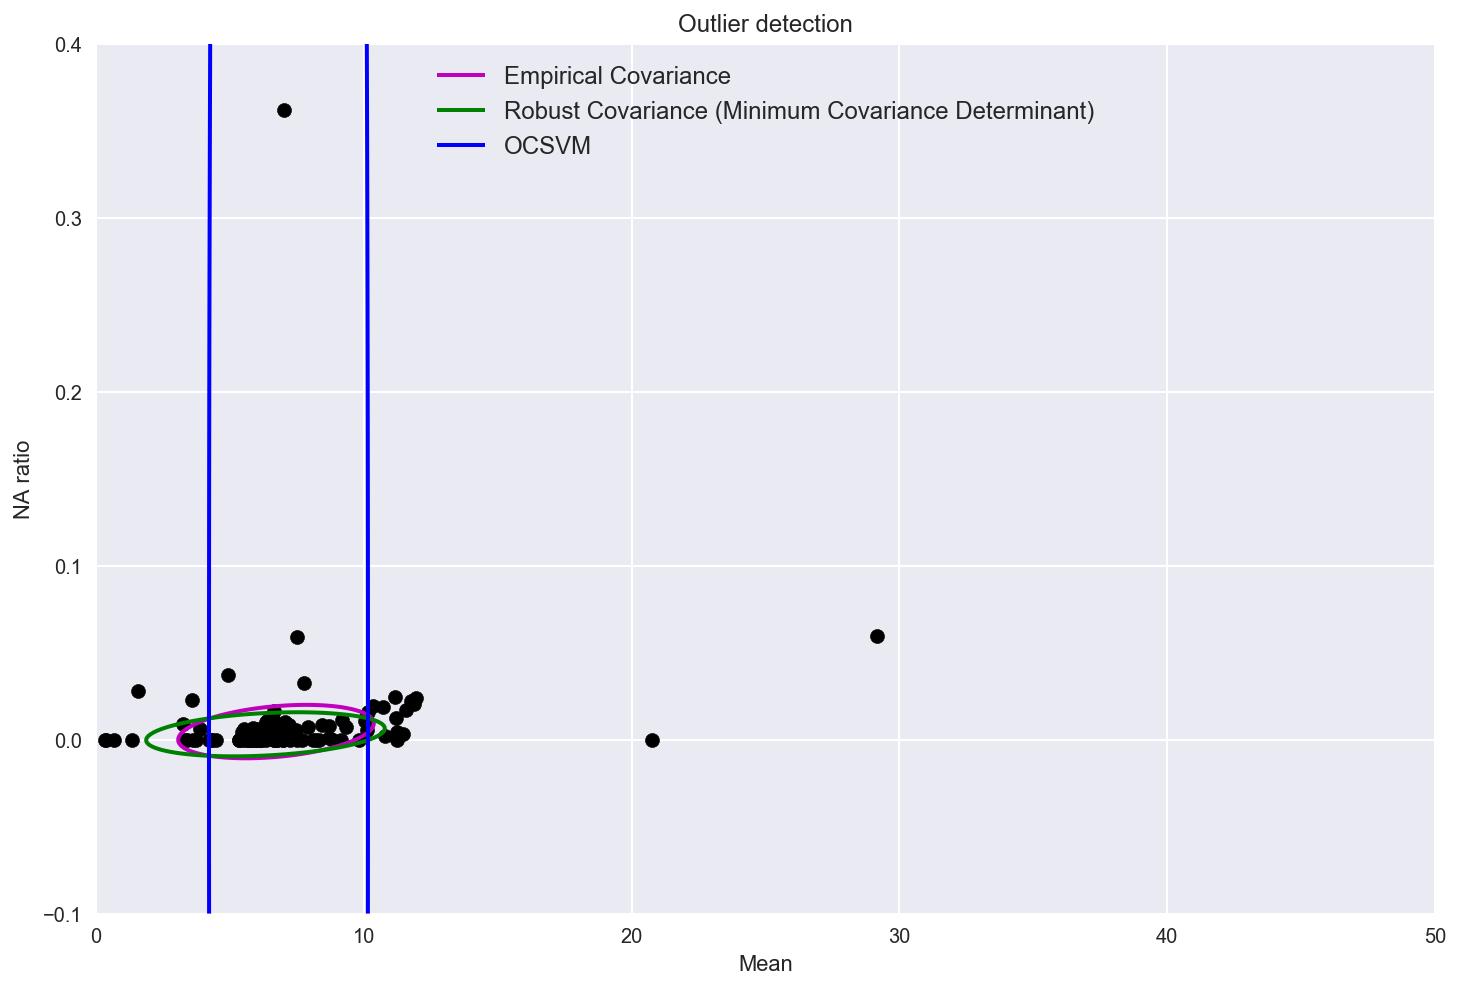

In [19]:
classifiers = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.,
                                             contamination=0.25),
    "Robust Covariance (Minimum Covariance Determinant)":
    EllipticEnvelope(contamination=0.25),
    "OCSVM": OneClassSVM(nu=0.25, gamma=0.01)}
colors = ['m', 'g', 'b']
legend1 = {}

# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(0, 50, 500), np.linspace(-0.1, 0.4, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1)
    clf.fit(X2)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(1)  # two clusters
plt.title("Outlier detection")
plt.scatter(X2[:, 0], X2[:, 1], color='black')
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0],
            legend1_values_list[1].collections[0],
            legend1_values_list[2].collections[0]),
           (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=12))
plt.ylabel("NA ratio")
plt.xlabel("Mean")
plt.show()